<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Ondas-y-Optica/blob/main/cuadernos/Onda_Viajera_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Onda viajera


Prof. Mario I. Caicedo

Vamos a propagar un paquete de ondas cuya forma, que recibe el nombre de *Ondícula Ricker* y a veces *ondícula de sombrero mexicano*, está dada por la fórmula

$$\psi(x)=\frac{2}{\sqrt{3\sigma}\pi^{1/3}}\,\left[1-\left(\frac{x}{\sigma}\right)^2\right]e^{\frac{x^2}{2\sigma^2}}$$

Esencialmente, una Ricker es la segunda derivada de una gaussiana.

**Ejercicio**

Haga las modificaciones necesarias para observar propagación hacia la izquierda

Bibliotecas

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

----------------------------------------------

* Esta celda prepara el área de graficación

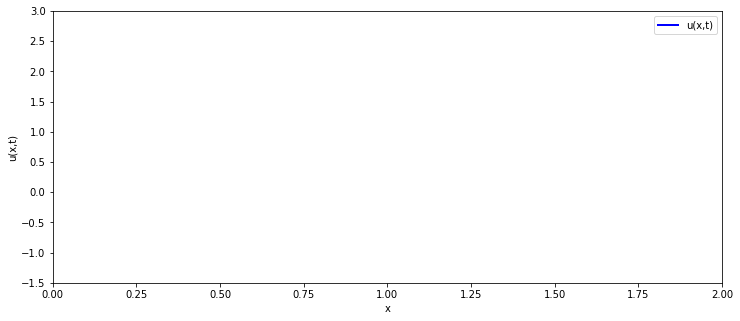

In [ ]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1)   

ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-1.5, 3.0))
ax1.set_xlabel('x')
ax1.set_ylabel('u(x,t)')

txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)

ax1.legend(['u(x,t)']);



----------------------------------------------



Definición de la óndicula

In [ ]:
def Rick(t,sigma):
  Norm=np.sqrt(3*sigma)*(np.pi**0.25)
  Norm=1/Norm

  s=(t/sigma)**2

  R=Norm*(1-s)*np.exp(-s/2)

  return R

------------------------------------------------

Entrada de los parámetros

In [ ]:
v=float(input('Introduzca la velocidad de fase (use valores entre 0.9 y 5 )'))
v=v/100
sigma=float(input('Introduzca el ancho del paquete de ondas use valores entre 3 y 5 '))
sigma=sigma/100

Introduzca la velocidad de fase (use valores entre 0.9 y 5 )0.9
Introduzca el ancho del paquete de ondas use valores entre 3 y 5 3


In [ ]:
def u(x,n): 
    
    fase=x-v*n
    u = Rick(fase,sigma)
    
    return u

-----------------------------------------------

* Preaparando la Animación

In [ ]:
def init():
    line1.set_data([], [])
    return line1,

In [ ]:
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    
    y1 = u(x,n)
    
    line1.set_data(x, y1)
    txt_title.set_text('Onda que viaja hacia la derecha. Cuadro = {0:4d}'.format(n))
    return line1,
    

**ANIMACIÓN**

In [ ]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
#anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)
anim = animation.FuncAnimation(fig, drawframe, frames=200, interval=20, blit=True)

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())